# Oil Futures

In [255]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Read in data

In [256]:
df = pd.read_csv(
    Path("../Resources/oil_futures.csv"), parse_dates=True, index_col="Date"
)

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472


<AxesSubplot:xlabel='Date'>

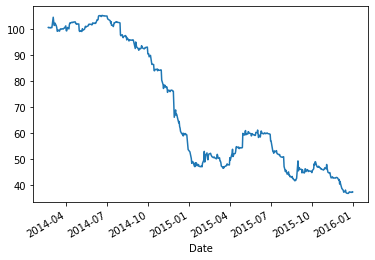

In [257]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

### Calculate returns

<AxesSubplot:xlabel='Date'>

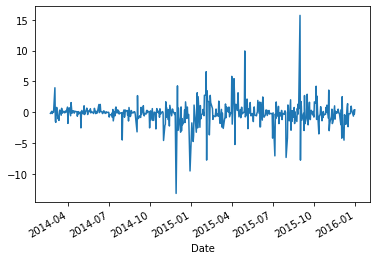

In [258]:
# Create a column of the settle price returns
settle_price_returns = df['Settle'].pct_change()*100
settle_price_returns.dropna(inplace=True)
settle_price_returns.plot()

In [259]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
df['Return']=settle_price_returns.copy()
df.drop(['Lagged_Return'], axis=1, inplace=True)
df['Lagged_Return'] = df['Return'].shift()
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,0.159030,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,-0.198472,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,0.119320,-0.198472
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,-0.019863,0.119320
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,0.009933,-0.019863


# Prepapre the Features (X) and the Target (y)

In [260]:
# Set the Dependent variable y to the `Return`
y=df['Return']
y.describe()

count    461.000000
mean      -0.195372
std        1.934616
min      -13.147881
25%       -0.705053
50%       -0.089802
75%        0.386828
max       15.714286
Name: Return, dtype: float64

In [261]:
# Select the `Lagged_Return` and assign the DataFrame to X
X=df['Lagged_Return'].to_frame()
X.head()

,Lagged_Return
Date,
2014-02-24,-0.168684
2014-02-25,0.159030
2014-02-26,-0.198472
2014-02-27,0.119320
2014-02-28,-0.019863


In [262]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
X['Week_of_year']=X.index.weekofyear
X.head()

<ipython-input-262-577c90645e48>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['Week_of_year']=X.index.weekofyear


,Lagged_Return,Week_of_year
Date,,
2014-02-24,-0.168684,9
2014-02-25,0.159030,9
2014-02-26,-0.198472,9
2014-02-27,0.119320,9
2014-02-28,-0.019863,9


### Get dummy variables for week and year

In [263]:
# Get a dummy variable for each week of the year
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_year'])
X_binary_encoded.head()

,Lagged_Return,Week_of_year_1,Week_of_year_2,Week_of_year_3,Week_of_year_4,Week_of_year_5,Week_of_year_6,Week_of_year_7,Week_of_year_8,Week_of_year_9,...,Week_of_year_44,Week_of_year_45,Week_of_year_46,Week_of_year_47,Week_of_year_48,Week_of_year_49,Week_of_year_50,Week_of_year_51,Week_of_year_52,Week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-24,-0.168684,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-25,0.159030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-26,-0.198472,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-27,0.119320,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,-0.019863,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [264]:
X_binary_encoded.shape

(461, 54)

### Linear Regresion model

In [265]:
# Create a Linear Regression model and fit it to the data
model=LinearRegression()
model.fit(X_binary_encoded,y)

LinearRegression()

In [266]:
# Create predictions using the trained model and the `X_binary_encoded` data
predictions=model.predict(X_binary_encoded)

# List the first 10 predictions
predictions[:10]

array([-0.09408009, -0.19278838, -0.08510803, -0.18082762, -0.13890543,
        0.22904997, -0.96762181,  0.66360517,  0.72241888,  0.19940254])

# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [267]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate r2_score (r-squared)
r2=r2_score(y, predictions)
print(f"r2:{r2}")

r2:0.20040272358975775


In [268]:
# Calculate mean squared error 
# Remember, a "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
MSE=mean_squared_error(y,predictions)

In [269]:
# Using mean squared error above, calculate root-mean-squared error (RMSE)
RMSE=np.sqrt(MSE)

In [270]:
# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")


R-squared (R2 ): 0.20040272358975775
Mean Squared Error (MSE): 2.9861924939839137
Root Mean Squared Error (RMSE): 1.7280603270672912
Standard Deviation of Futures Return: 1.9325166602824384


In [271]:
predictions_df = pd.DataFrame(predictions)
ax=predictions_df.plot

<AxesSubplot:xlabel='Date'>

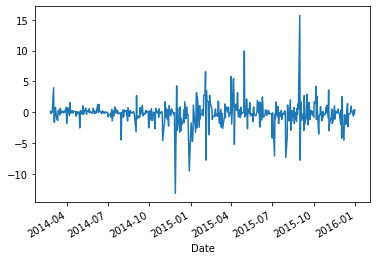

In [272]:
y.plot()